📊 Loading Volatility Data and Meta-Learning Targets
✅ Loaded processed data: (2505, 110)
✅ Loaded targets data: (2505, 7)

🔍 Available columns in processed data: 110
🔍 Available columns in targets: ['date', 'TARGET_VIX_TERM_STRUCTURE', 'TARGET_REALIZED_VS_IMPLIED', 'TARGET_CROSS_ASSET_CORRELATION', 'TARGET_VOLATILITY_DISPERSION', 'TARGET_VOL_OF_VOL_RATIO', 'REALIZED_VOL_30D']
🎯 Target columns found: ['TARGET_VIX_TERM_STRUCTURE', 'TARGET_REALIZED_VS_IMPLIED', 'TARGET_CROSS_ASSET_CORRELATION', 'TARGET_VOLATILITY_DISPERSION', 'TARGET_VOL_OF_VOL_RATIO']

📊 Buffer Period Analysis:
   • TARGET_VIX_TERM_STRUCTURE: 0 nulls, first valid: 2015-05-27 00:00:00
   • TARGET_REALIZED_VS_IMPLIED: 19 nulls, first valid: 2015-06-23 00:00:00
   • TARGET_CROSS_ASSET_CORRELATION: 19 nulls, first valid: 2015-06-23 00:00:00
   • TARGET_VOLATILITY_DISPERSION: 0 nulls, first valid: 2015-05-27 00:00:00
   • TARGET_VOL_OF_VOL_RATIO: 0 nulls, first valid: 2015-05-27 00:00:00

📈 Merged dataset: 2505 days from 2015

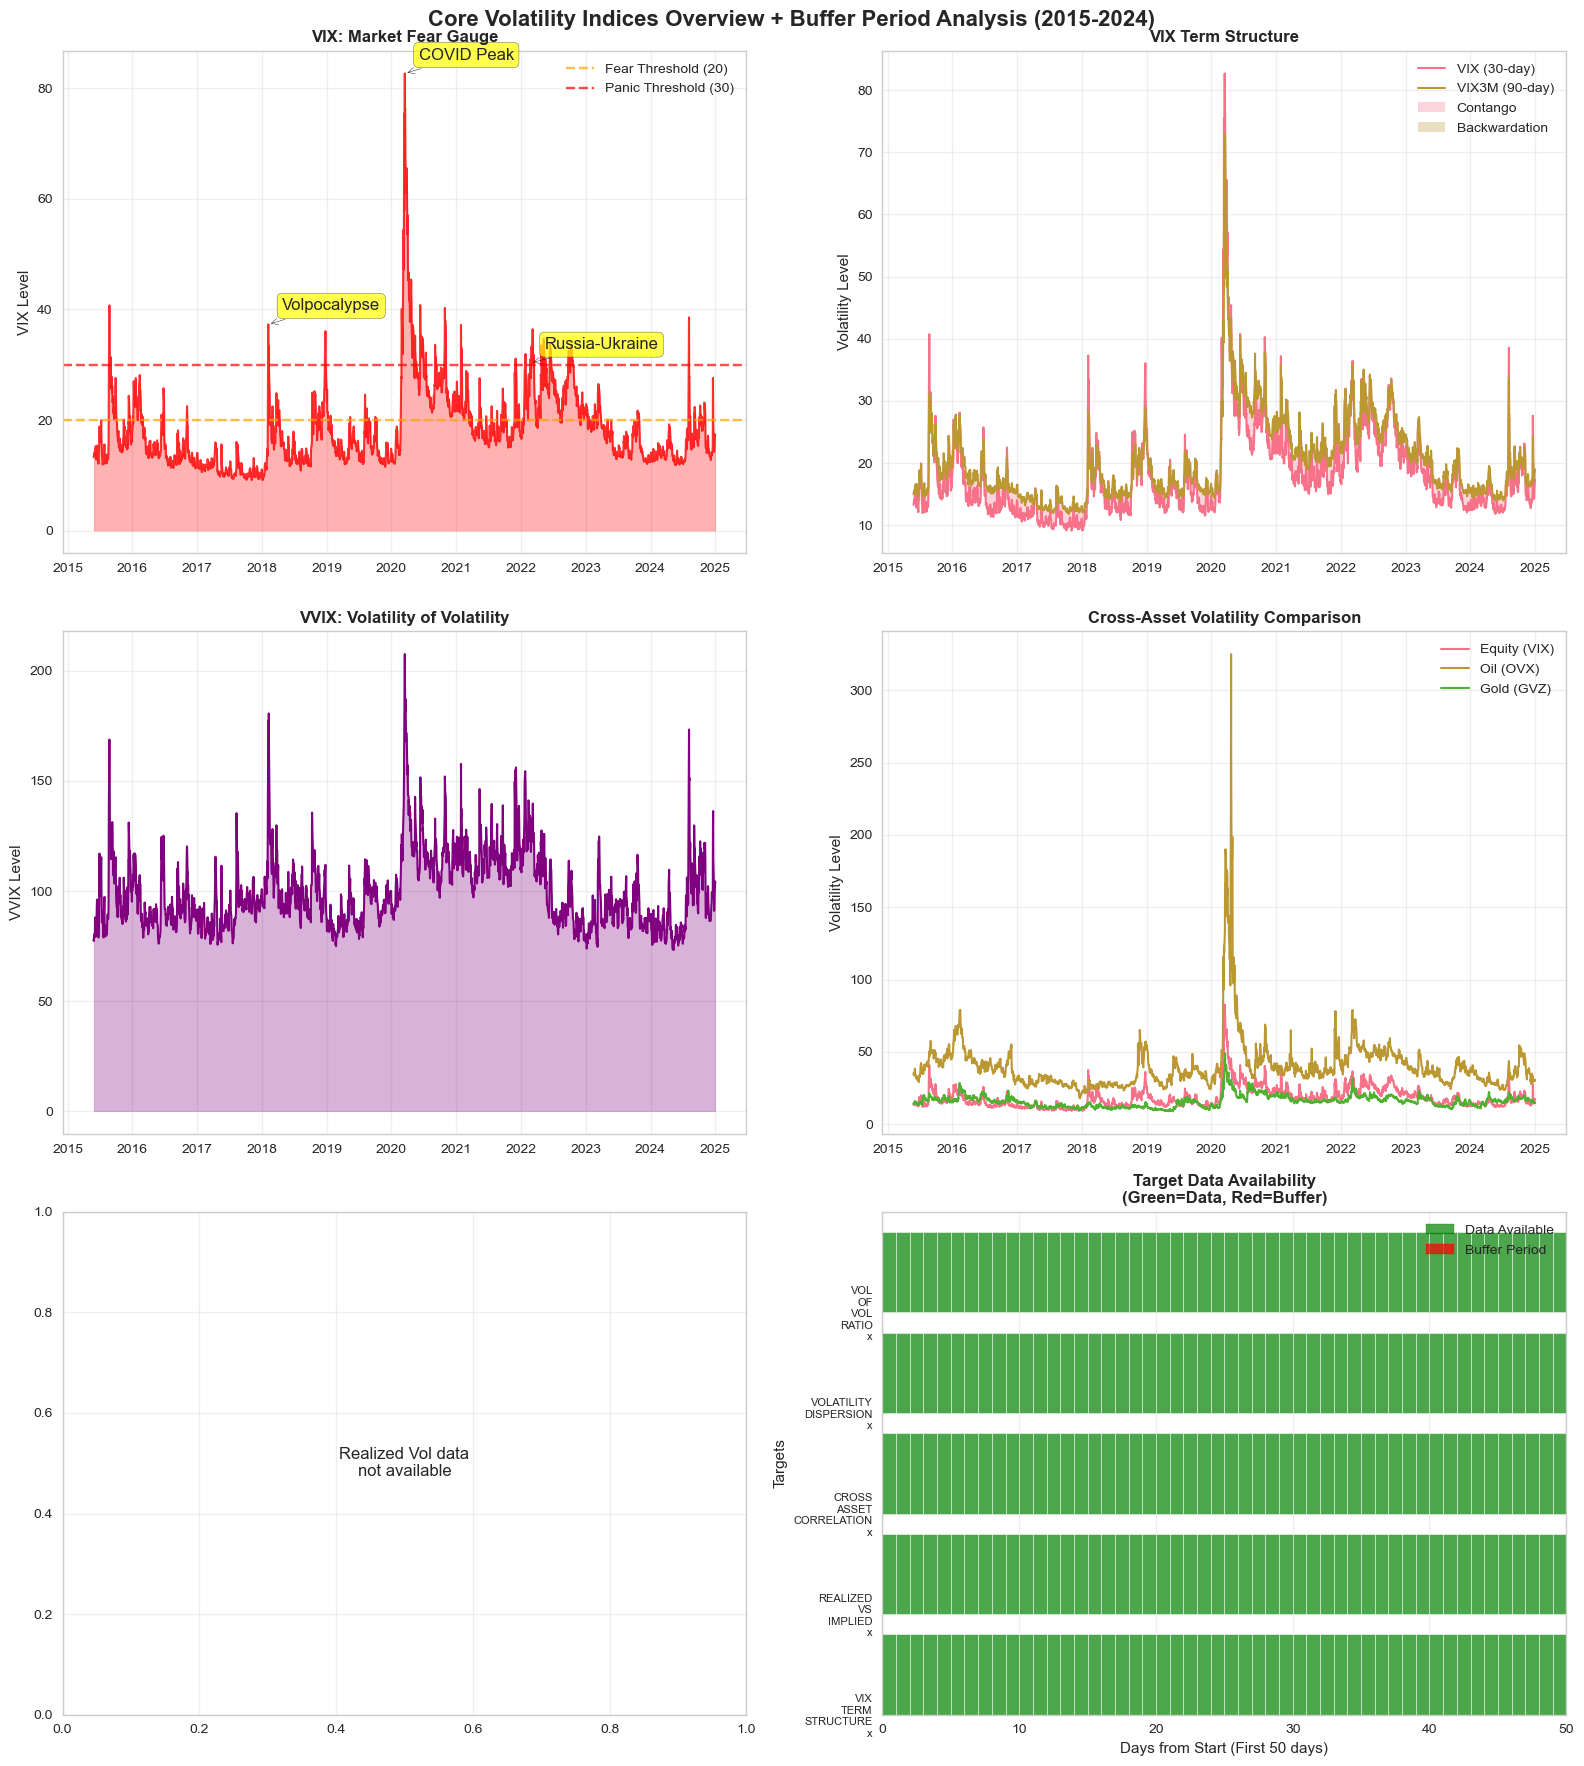


🎯 Plotting 10 targets: ['TARGET_VIX_TERM_STRUCTURE_x', 'TARGET_REALIZED_VS_IMPLIED_x', 'TARGET_CROSS_ASSET_CORRELATION_x', 'TARGET_VOLATILITY_DISPERSION_x', 'TARGET_VOL_OF_VOL_RATIO_x', 'TARGET_VIX_TERM_STRUCTURE_y', 'TARGET_REALIZED_VS_IMPLIED_y', 'TARGET_CROSS_ASSET_CORRELATION_y', 'TARGET_VOLATILITY_DISPERSION_y', 'TARGET_VOL_OF_VOL_RATIO_y']


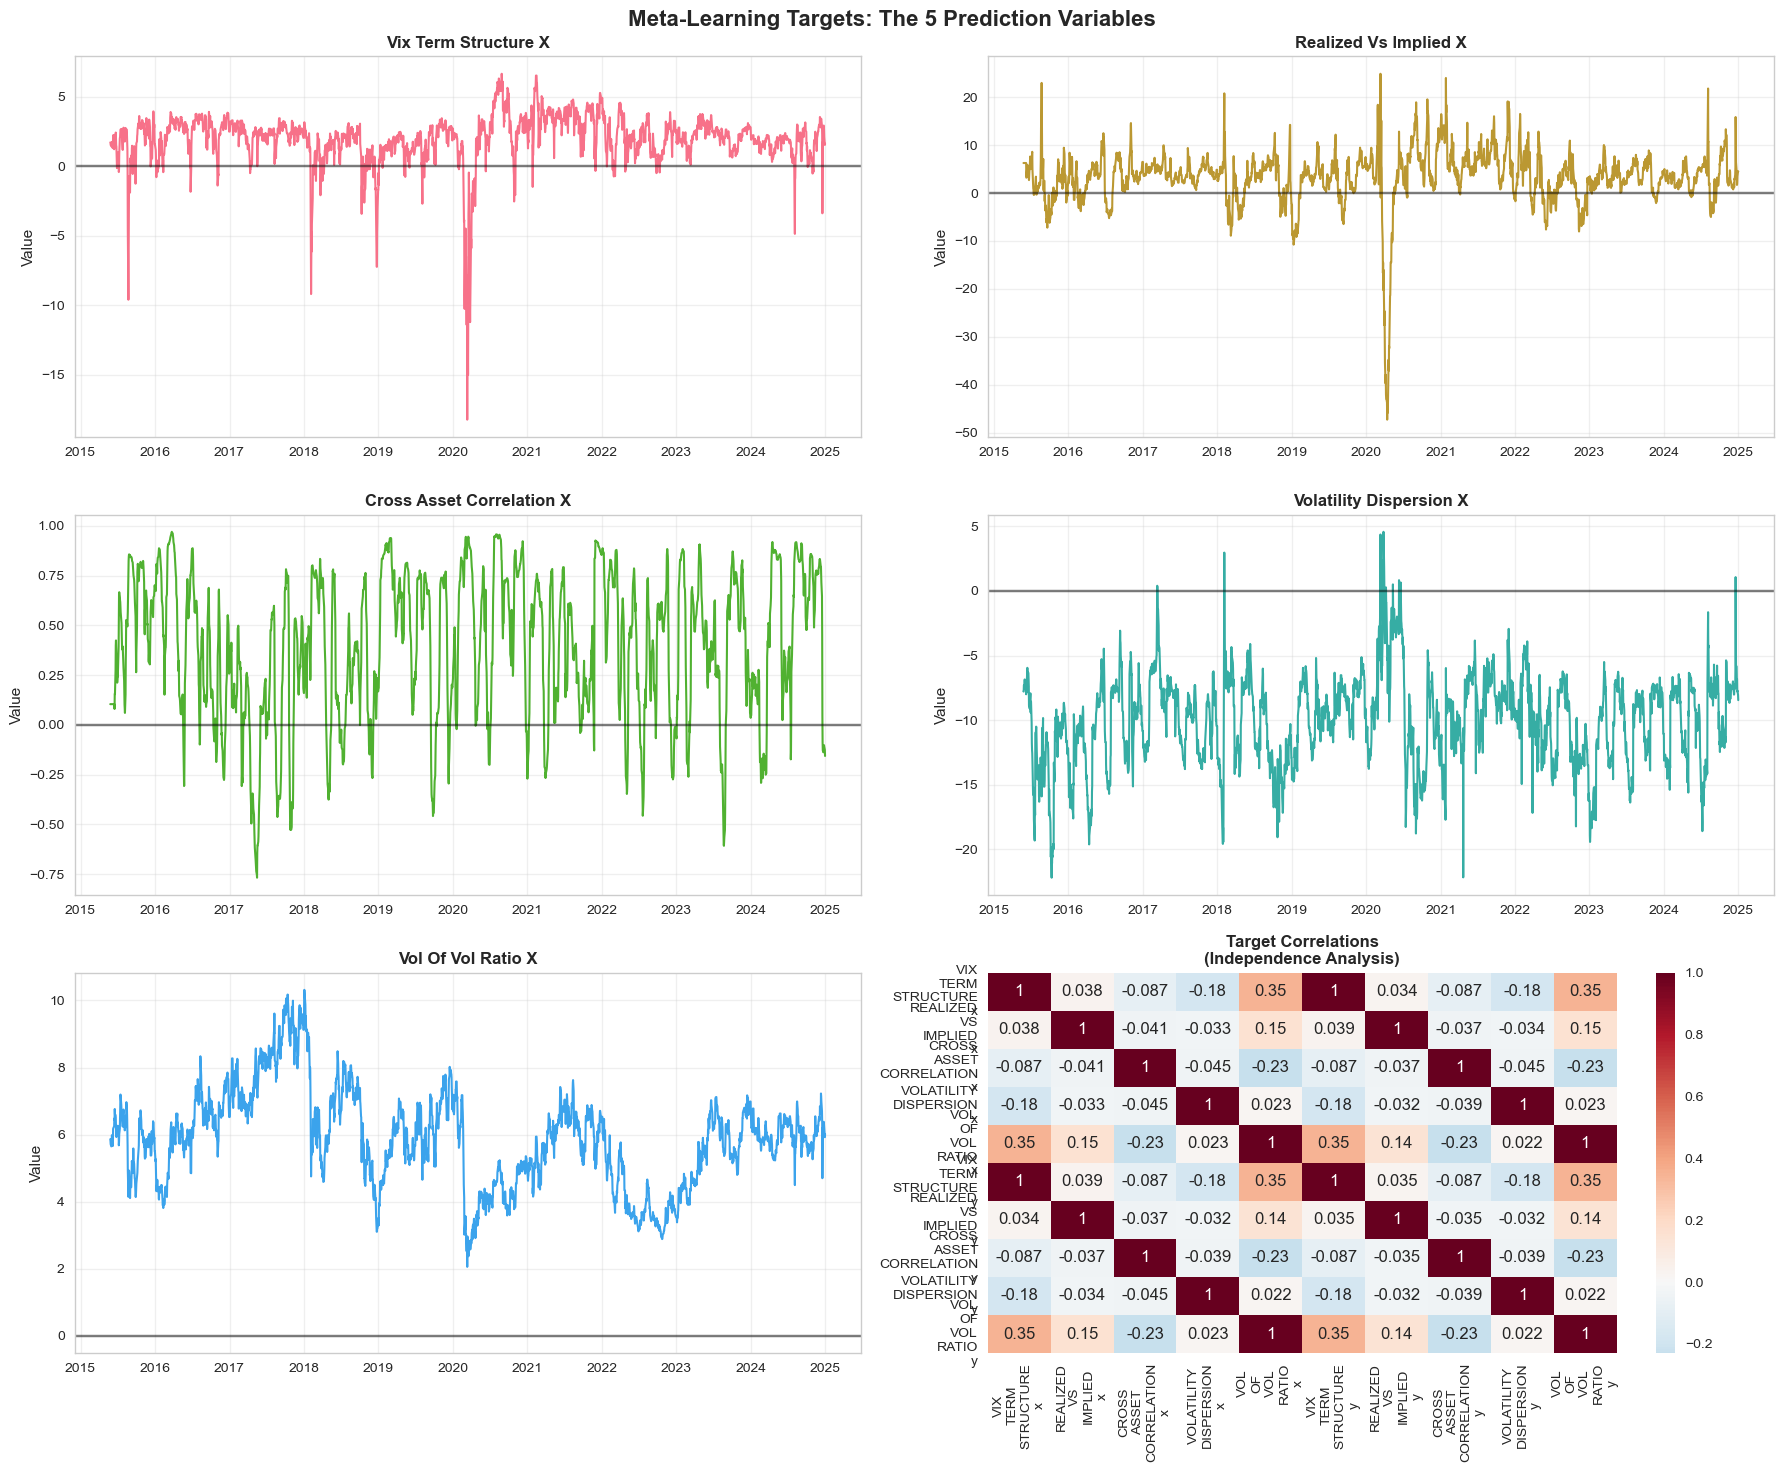

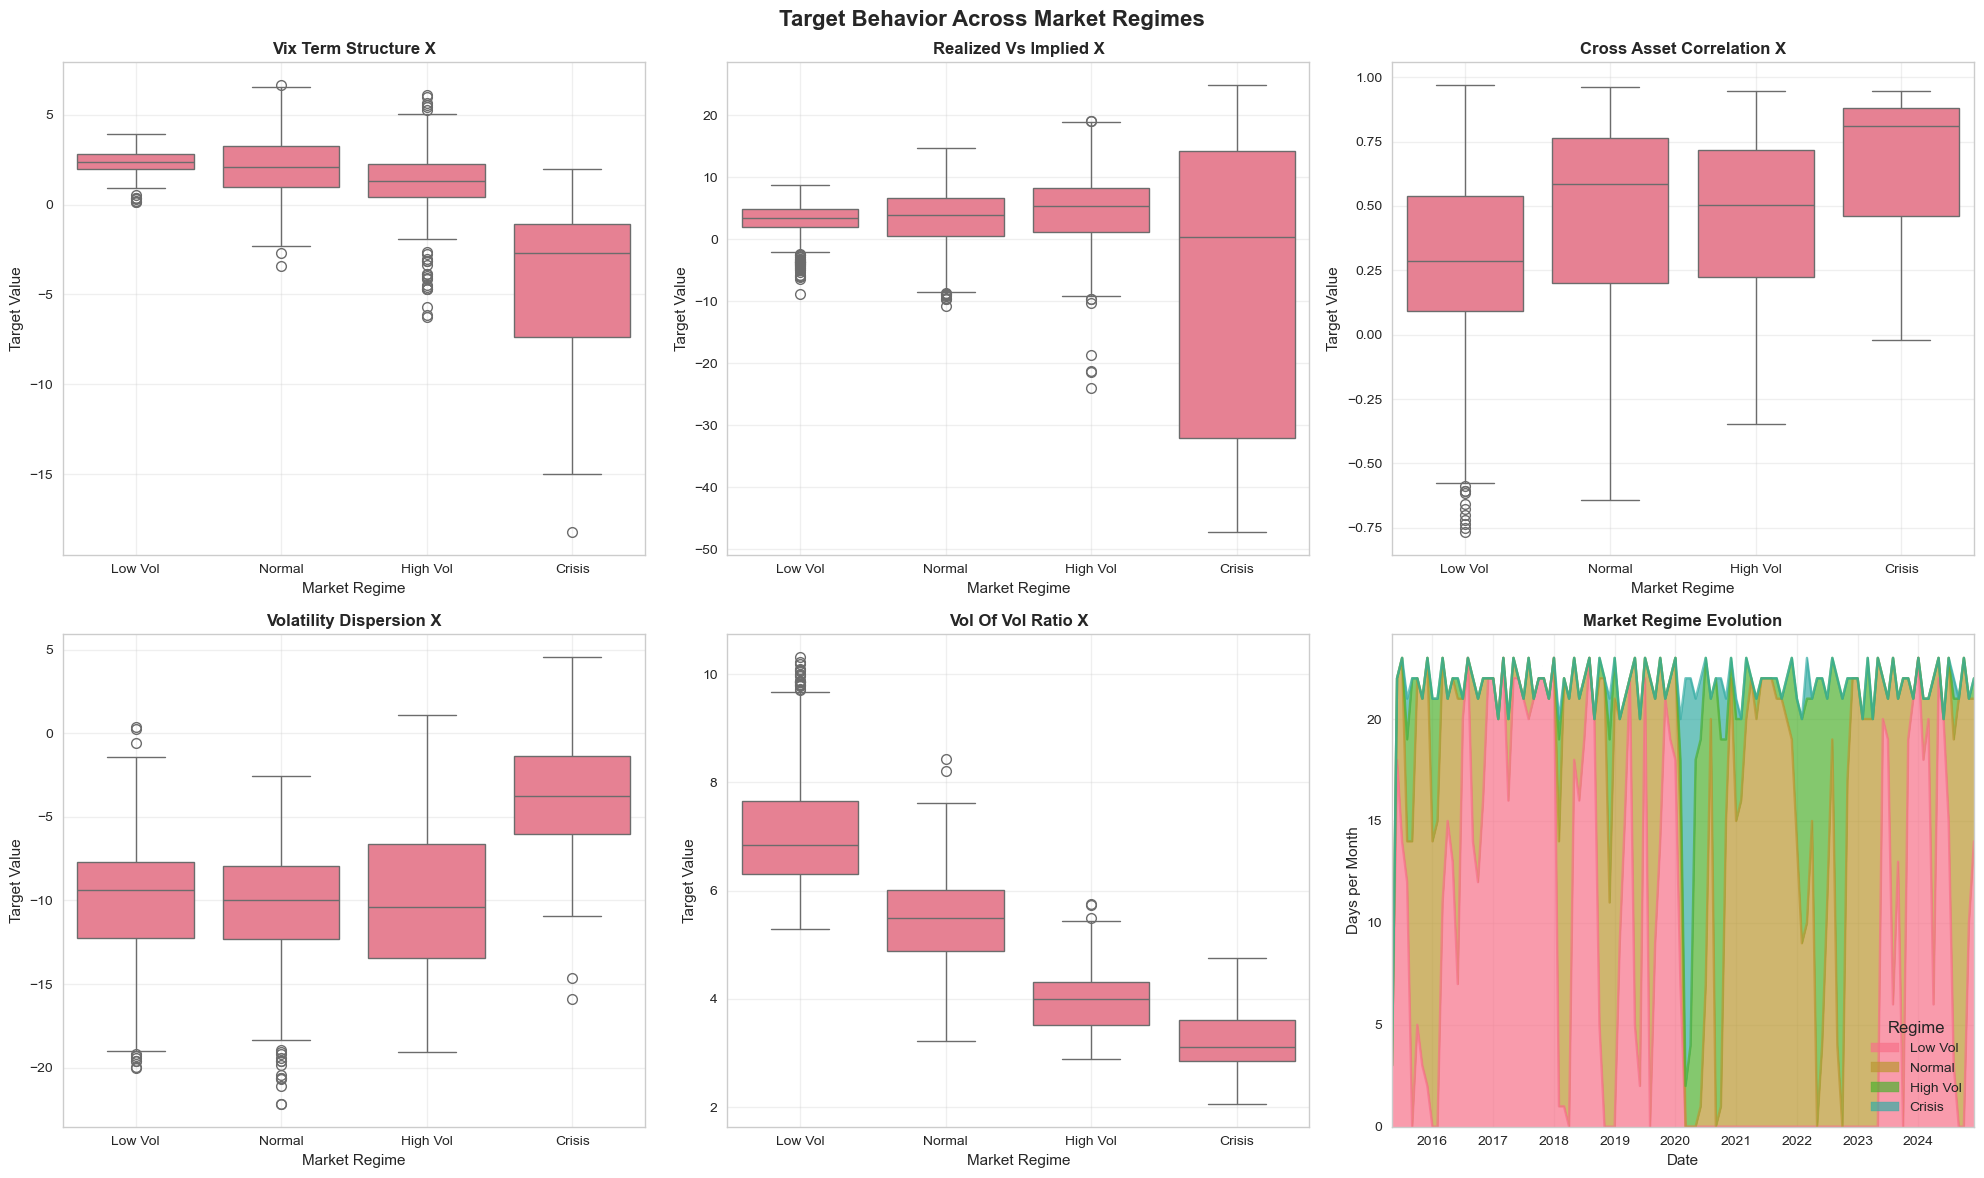

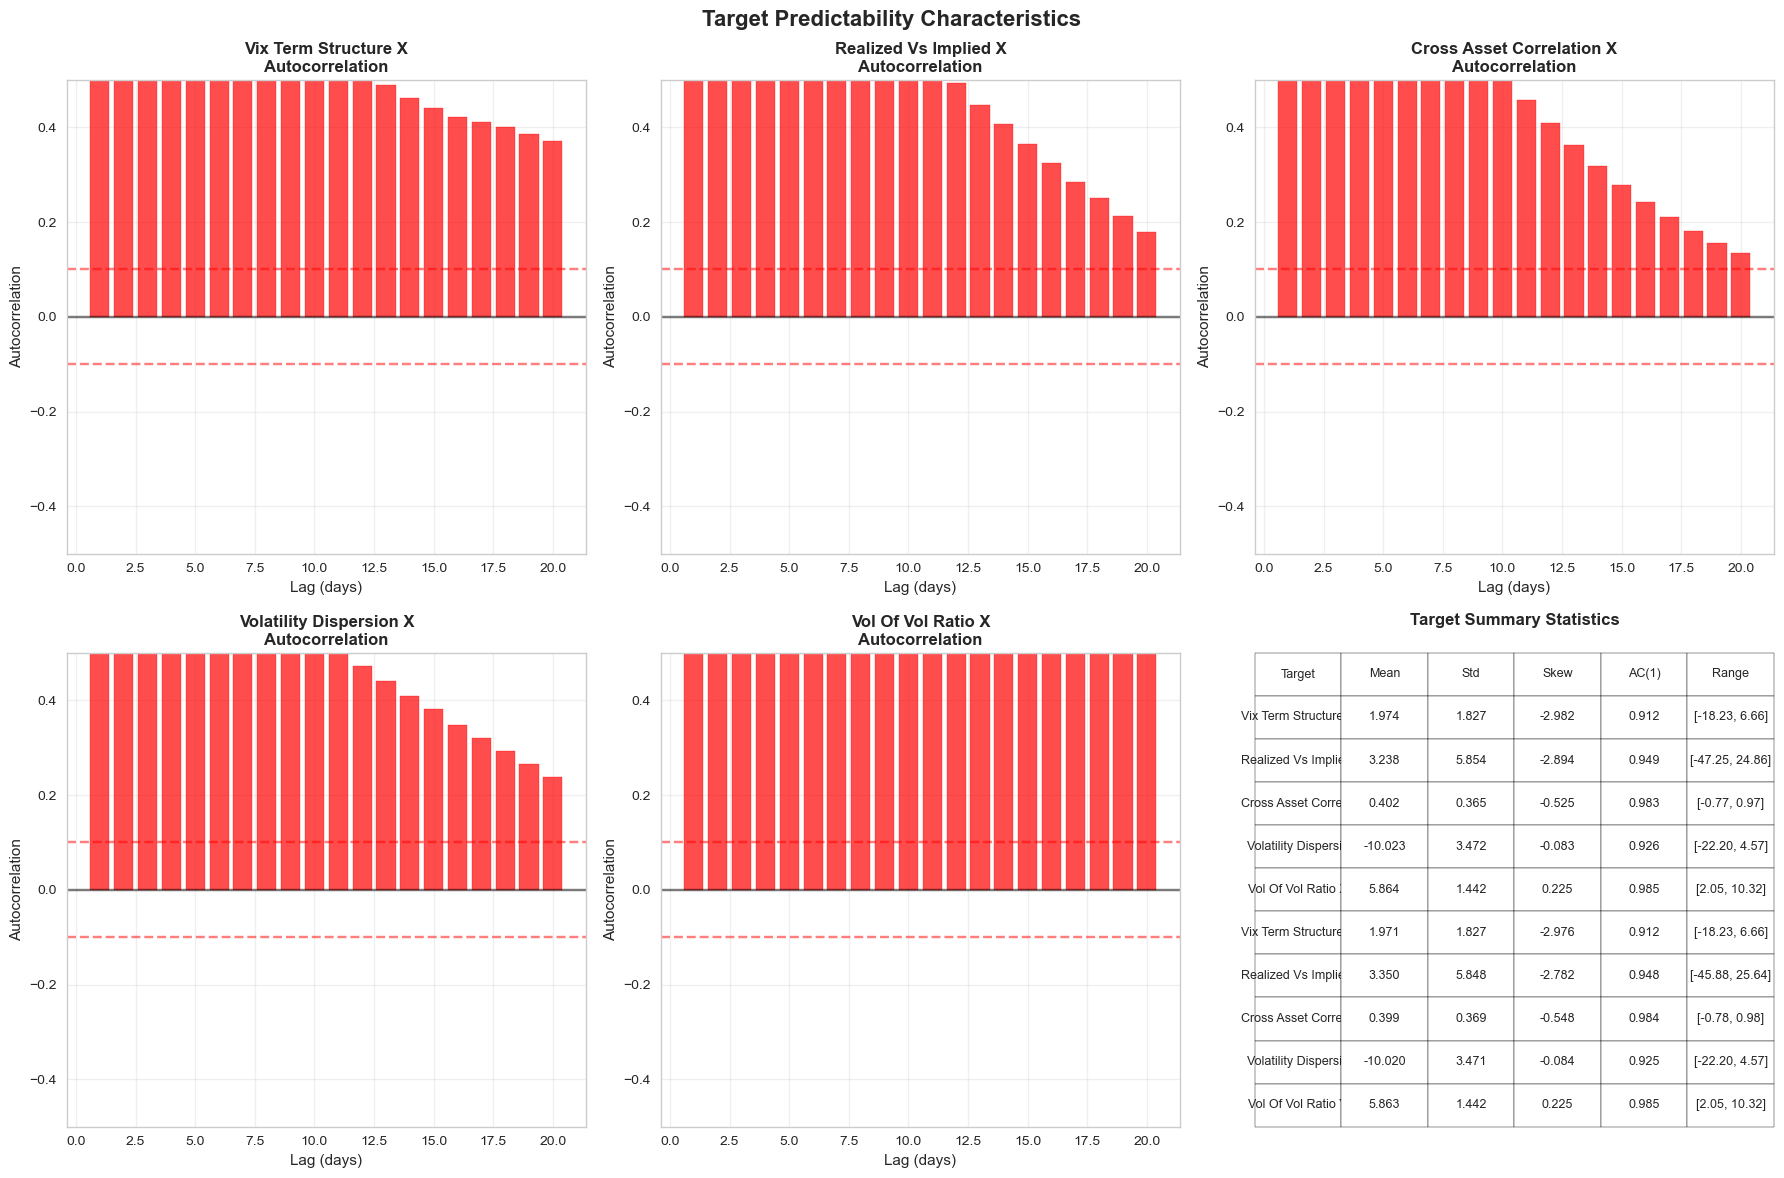

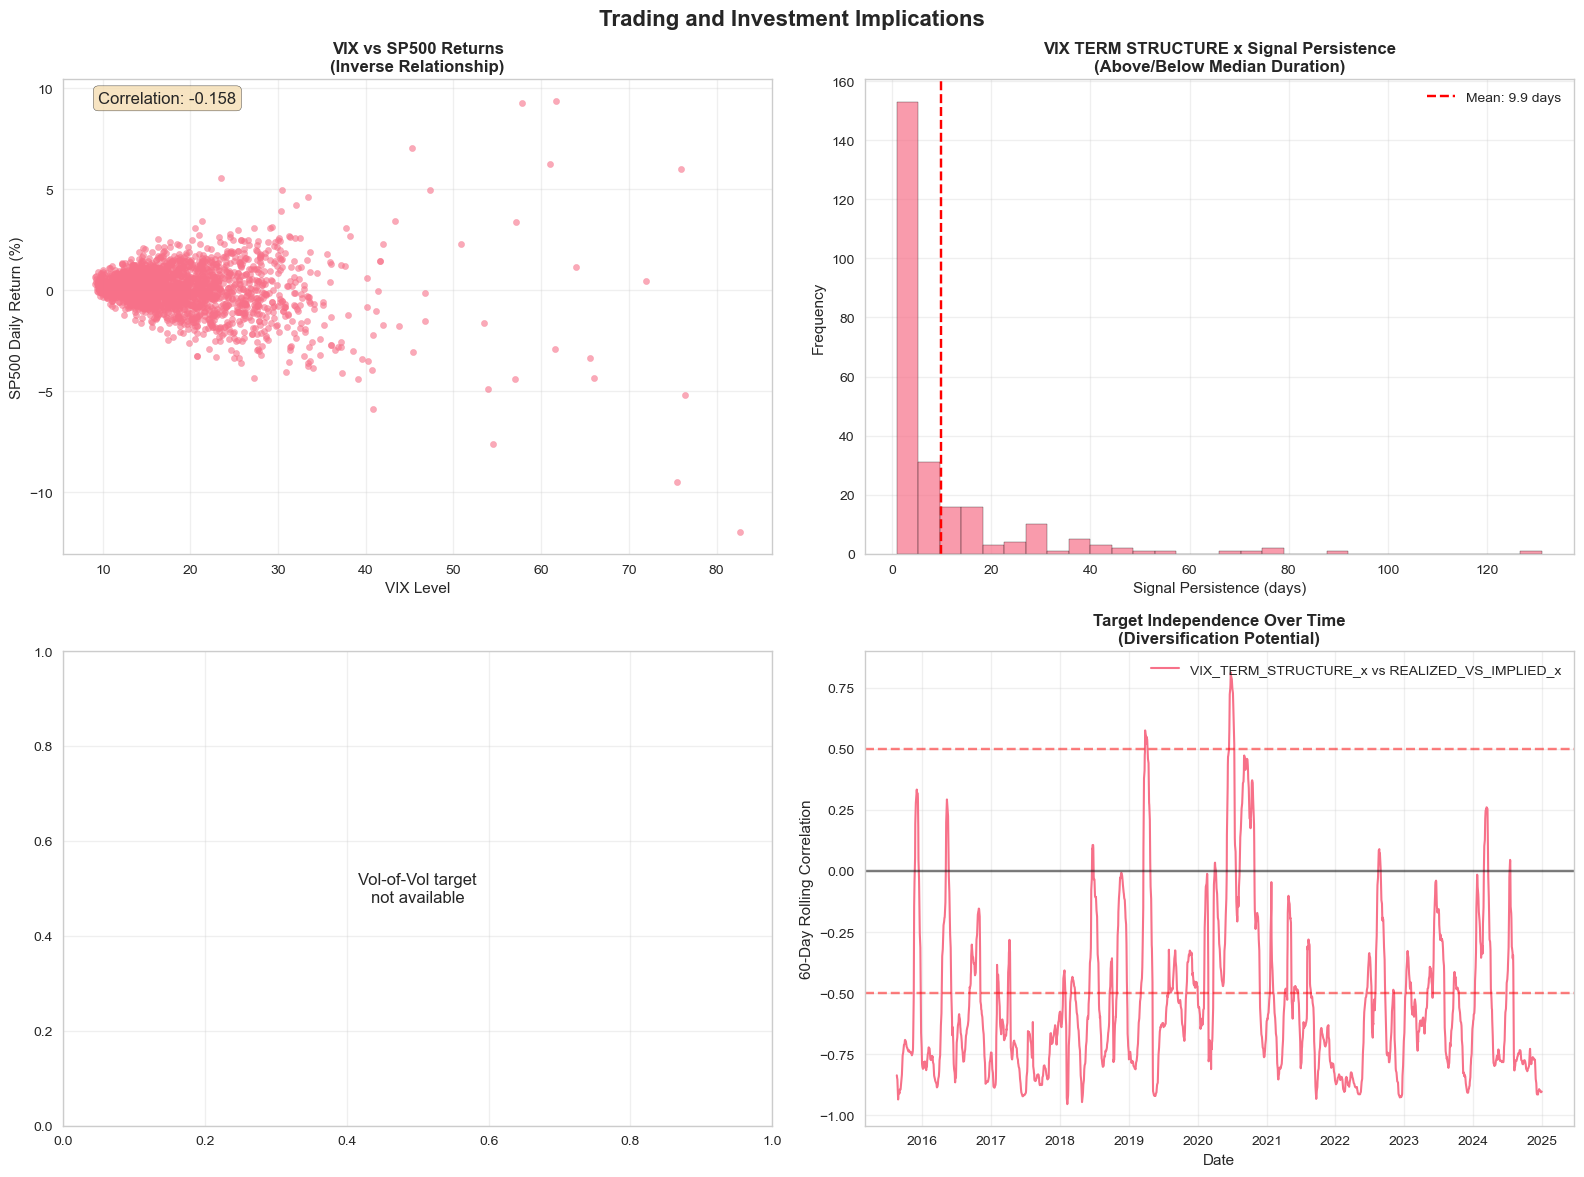


📊 DATA QUALITY AND TARGET COMPLETENESS SUMMARY
📈 Dataset Overview:
   • Total observations: 2,505
   • Date range: 2015-05-27 to 2024-12-31
   • Business days covered: 2,505

🎯 Target Completeness:
   • Vix Term Structure X: 2,505/2,505 (100.0%)
   • Realized Vs Implied X: 2,505/2,505 (100.0%)
   • Cross Asset Correlation X: 2,505/2,505 (100.0%)
   • Volatility Dispersion X: 2,505/2,505 (100.0%)
   • Vol Of Vol Ratio X: 2,505/2,505 (100.0%)
   • Vix Term Structure Y: 2,505/2,505 (100.0%)
   • Realized Vs Implied Y: 2,486/2,505 (99.2%)
     Missing: 19 obs (likely buffer period)
   • Cross Asset Correlation Y: 2,486/2,505 (99.2%)
     Missing: 19 obs (likely buffer period)
   • Volatility Dispersion Y: 2,505/2,505 (100.0%)
   • Vol Of Vol Ratio Y: 2,505/2,505 (100.0%)

📊 Target Characteristics:
   • Vix Term Structure X:
     - Trend correlation: 0.046
     - 1-day autocorr: 0.912
     - Volatility: 1.827
   • Realized Vs Implied X:
     - Trend correlation: 0.051
     - 1-day autocorr

In [17]:
# Volatility Data and Meta-Learning Targets Visualization
# Complete analysis and visualization of processed volatility data and targets

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
import matplotlib.patches as patches
warnings.filterwarnings('ignore')

# Set style for publication-quality plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# ============================================================================
# 1. DATA LOADING AND PREPARATION
# ============================================================================

print("📊 Loading Volatility Data and Meta-Learning Targets")
print("="*60)

# Load processed data and targets
try:
    processed_df = pd.read_csv('data/processed/processed_volatility_data.csv')
    targets_df = pd.read_csv('data/processed/meta_learning_targets.csv')
    
    print(f"✅ Loaded processed data: {processed_df.shape}")
    print(f"✅ Loaded targets data: {targets_df.shape}")
    
except FileNotFoundError as e:
    print(f"❌ Error loading data: {e}")
    print("Please run the data processing and target calculation scripts first!")
    exit()

# Convert dates
processed_df['date'] = pd.to_datetime(processed_df['date'])
targets_df['date'] = pd.to_datetime(targets_df['date'])

# Check what columns we have
print(f"\n🔍 Available columns in processed data: {len(processed_df.columns)}")
print(f"🔍 Available columns in targets: {list(targets_df.columns)}")

# Check for target columns in targets_df
target_columns_available = [col for col in targets_df.columns if col.startswith('TARGET_')]
print(f"🎯 Target columns found: {target_columns_available}")

if len(target_columns_available) == 0:
    print("❌ No target columns found! Please run target calculation first.")
    exit()

# Show buffer period analysis
print(f"\n📊 Buffer Period Analysis:")
for target_col in target_columns_available:
    if target_col in targets_df.columns:
        first_valid_idx = targets_df[target_col].first_valid_index()
        total_nulls = targets_df[target_col].isnull().sum()
        
        if first_valid_idx is not None:
            first_valid_date = targets_df.loc[first_valid_idx, 'date']
            print(f"   • {target_col}: {total_nulls} nulls, first valid: {first_valid_date}")
        else:
            print(f"   • {target_col}: ALL NULL - calculation failed!")

# Merge for analysis - use inner join to ensure we only get rows with targets
df = processed_df.merge(targets_df, on='date', how='inner')

print(f"\n📈 Merged dataset: {df.shape[0]} days from {df['date'].min()} to {df['date'].max()}")
print(f"🎯 Targets available: {len([col for col in df.columns if col.startswith('TARGET_')])} prediction targets")

# Show data availability after merge
print(f"\n📋 Target Data Availability After Merge:")
for target_col in target_columns_available:
    if target_col in df.columns:
        valid_count = df[target_col].count()
        total_count = len(df)
        valid_pct = (valid_count / total_count) * 100
        print(f"   • {target_col}: {valid_count}/{total_count} ({valid_pct:.1f}%)")
    else:
        print(f"   • {target_col}: NOT FOUND in merged data")

# Verify key columns exist
required_cols = ['VIX', 'VIX3M', 'VVIX', 'OVX', 'GVZ', 'SP500_RETURNS']
missing_cols = [col for col in required_cols if col not in df.columns]
if missing_cols:
    print(f"⚠️  Missing required columns: {missing_cols}")
else:
    print("✅ All required columns present")

# ============================================================================
# 2. CORE VOLATILITY INDICES OVERVIEW + BUFFER PERIOD ANALYSIS
# ============================================================================

fig, axes = plt.subplots(3, 2, figsize=(16, 18))
fig.suptitle('Core Volatility Indices Overview + Buffer Period Analysis (2015-2024)', fontsize=16, fontweight='bold')

# Plot 1: VIX with major market events
ax1 = axes[0, 0]
ax1.plot(df['date'], df['VIX'], linewidth=1.5, alpha=0.8, color='red')
ax1.fill_between(df['date'], df['VIX'], alpha=0.3, color='red')
ax1.axhline(y=20, color='orange', linestyle='--', alpha=0.7, label='Fear Threshold (20)')
ax1.axhline(y=30, color='red', linestyle='--', alpha=0.7, label='Panic Threshold (30)')
ax1.set_title('VIX: Market Fear Gauge', fontweight='bold')
ax1.set_ylabel('VIX Level')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Add major crisis annotations
crisis_dates = [
    ('2020-03-16', 'COVID Peak'),
    ('2022-02-24', 'Russia-Ukraine'),
    ('2018-02-05', 'Volpocalypse')
]
for date, label in crisis_dates:
    try:
        crisis_date = pd.to_datetime(date)
        if crisis_date >= df['date'].min() and crisis_date <= df['date'].max():
            crisis_vix = df[df['date'] == crisis_date]['VIX'].iloc[0]
            ax1.annotate(label, xy=(crisis_date, crisis_vix), 
                        xytext=(10, 10), textcoords='offset points',
                        bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7),
                        arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))
    except:
        pass

# Plot 2: Term Structure (VIX vs VIX3M)
ax2 = axes[0, 1]
ax2.plot(df['date'], df['VIX'], label='VIX (30-day)', linewidth=1.5)
ax2.plot(df['date'], df['VIX3M'], label='VIX3M (90-day)', linewidth=1.5)
ax2.fill_between(df['date'], df['VIX'], df['VIX3M'], 
                alpha=0.3, where=(df['VIX3M'] > df['VIX']), label='Contango', interpolate=True)
ax2.fill_between(df['date'], df['VIX'], df['VIX3M'], 
                alpha=0.3, where=(df['VIX'] > df['VIX3M']), label='Backwardation', interpolate=True)
ax2.set_title('VIX Term Structure', fontweight='bold')
ax2.set_ylabel('Volatility Level')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Vol-of-Vol (VVIX)
ax3 = axes[1, 0]
ax3.plot(df['date'], df['VVIX'], color='purple', linewidth=1.5)
ax3.fill_between(df['date'], df['VVIX'], alpha=0.3, color='purple')
ax3.set_title('VVIX: Volatility of Volatility', fontweight='bold')
ax3.set_ylabel('VVIX Level')
ax3.grid(True, alpha=0.3)

# Plot 4: Cross-Asset Volatilities
ax4 = axes[1, 1]
ax4.plot(df['date'], df['VIX'], label='Equity (VIX)', linewidth=1.5)
ax4.plot(df['date'], df['OVX'], label='Oil (OVX)', linewidth=1.5)
ax4.plot(df['date'], df['GVZ'], label='Gold (GVZ)', linewidth=1.5)
ax4.set_title('Cross-Asset Volatility Comparison', fontweight='bold')
ax4.set_ylabel('Volatility Level')
ax4.legend()
ax4.grid(True, alpha=0.3)

# Plot 5: Buffer Period Visualization - Rolling Window Targets
ax5 = axes[2, 0]
if 'TARGET_REALIZED_VS_IMPLIED' in df.columns and 'REALIZED_VOL_30D' in df.columns:
    # Show the buffer period clearly
    realized_vol = df['REALIZED_VOL_30D']
    target_data = df['TARGET_REALIZED_VS_IMPLIED']
    
    # Plot realized vol with buffer period highlighted
    ax5.plot(df['date'], realized_vol, label='30-Day Realized Vol', linewidth=1.5, color='blue')
    ax5.plot(df['date'], df['VIX'], label='VIX (Implied)', linewidth=1.5, color='red', alpha=0.7)
    
    # Highlight buffer period
    buffer_mask = realized_vol.isnull()
    if buffer_mask.any():
        buffer_dates = df[buffer_mask]['date']
        ax5.axvspan(buffer_dates.min(), buffer_dates.max(), alpha=0.3, color='gray', label='Buffer Period (No Data)')
    
    ax5.set_title('Buffer Period: 30-Day Rolling Window\n(Realized Volatility)', fontweight='bold')
    ax5.set_ylabel('Volatility (%)')
    ax5.legend()
    ax5.grid(True, alpha=0.3)
else:
    ax5.text(0.5, 0.5, 'Realized Vol data\nnot available', ha='center', va='center', transform=ax5.transAxes)

# Plot 6: Buffer Period Impact on Targets
ax6 = axes[2, 1]
# Show data availability for all targets
target_cols = [col for col in df.columns if col.startswith('TARGET_')]
if target_cols:
    # Create a heatmap showing data availability
    availability_data = []
    labels = []
    
    for target_col in target_cols[:5]:  # Max 5 targets
        target_name = target_col.replace('TARGET_', '').replace('_', '\n')
        labels.append(target_name)
        
        # Create binary series: 1 = data available, 0 = missing
        availability = (~df[target_col].isnull()).astype(int)
        availability_data.append(availability.values)
    
    # Show first 50 days to highlight buffer period
    days_to_show = min(50, len(df))
    x_positions = range(days_to_show)
    
    for i, (target_name, availability) in enumerate(zip(labels, availability_data)):
        y_pos = i
        for j, has_data in enumerate(availability[:days_to_show]):
            color = 'green' if has_data else 'red'
            rect = patches.Rectangle((j, y_pos), 1, 0.8, linewidth=0.5, 
                                   edgecolor='white', facecolor=color, alpha=0.7)
            ax6.add_patch(rect)
    
    ax6.set_xlim(0, days_to_show)
    ax6.set_ylim(0, len(labels))
    ax6.set_xlabel('Days from Start (First 50 days)')
    ax6.set_ylabel('Targets')
    ax6.set_yticks(range(len(labels)))
    ax6.set_yticklabels(labels, fontsize=8)
    ax6.set_title('Target Data Availability\n(Green=Data, Red=Buffer)', fontweight='bold')
    
    # Add legend
    green_patch = patches.Patch(color='green', alpha=0.7, label='Data Available')
    red_patch = patches.Patch(color='red', alpha=0.7, label='Buffer Period')
    ax6.legend(handles=[green_patch, red_patch], loc='upper right')
    
else:
    ax6.text(0.5, 0.5, 'No targets available\nfor buffer analysis', ha='center', va='center', transform=ax6.transAxes)

plt.tight_layout()
plt.show()

# ============================================================================
# 3. META-LEARNING TARGETS DEEP DIVE
# ============================================================================

# Get the actual target column names from the dataframe
actual_target_cols = [col for col in df.columns if col.startswith('TARGET_')]
print(f"\n🎯 Plotting {len(actual_target_cols)} targets: {actual_target_cols}")

# Only proceed if we have targets
if len(actual_target_cols) == 0:
    print("❌ No target columns found in merged dataframe!")
    print("Available columns:", df.columns.tolist())
    exit()

fig, axes = plt.subplots(3, 2, figsize=(18, 15))
fig.suptitle('Meta-Learning Targets: The 5 Prediction Variables', fontsize=16, fontweight='bold')

# Define target plotting info (adapt to what we actually have)
target_plot_info = {
    'TARGET_VIX_TERM_STRUCTURE': {
        'title': 'Target 1: VIX Term Structure Slope\n(VIX3M - VIX)',
        'color': 'blue',
        'ylabel': 'Slope (points)',
        'pos_label': 'Contango',
        'neg_label': 'Backwardation'
    },
    'TARGET_REALIZED_VS_IMPLIED': {
        'title': 'Target 2: Implied vs Realized Vol Spread\n(VIX - 30d Realized Vol)',
        'color': 'orange', 
        'ylabel': 'Spread (points)',
        'pos_label': 'Risk Premium',
        'neg_label': 'Realized > Implied'
    },
    'TARGET_CROSS_ASSET_CORRELATION': {
        'title': 'Target 3: VIX-OVX Correlation\n(30-day Rolling)',
        'color': 'green',
        'ylabel': 'Correlation',
        'ylim': (-1, 1),
        'special_lines': [0.5, -0.5]
    },
    'TARGET_VOLATILITY_DISPERSION': {
        'title': 'Target 4: Volatility Dispersion\n(VIX - Avg Individual Vol)',
        'color': 'purple',
        'ylabel': 'Dispersion (points)',
        'pos_label': 'Market > Individual',
        'neg_label': 'Individual > Market'
    },
    'TARGET_VOL_OF_VOL_RATIO': {
        'title': 'Target 5: Vol-of-Vol Ratio\n(VVIX / VIX)',
        'color': 'red',
        'ylabel': 'Ratio',
        'median_line': True
    }
}

# Plot each available target
plot_positions = [(0,0), (0,1), (1,0), (1,1), (2,0)]

for i, target_col in enumerate(actual_target_cols[:5]):  # Max 5 targets
    if i >= len(plot_positions):
        break
        
    row, col = plot_positions[i]
    ax = axes[row, col]
    
    # Get plot info or use defaults
    plot_info = target_plot_info.get(target_col, {
        'title': target_col.replace('TARGET_', '').replace('_', ' ').title(),
        'color': f'C{i}',
        'ylabel': 'Value'
    })
    
    # Plot the target
    target_data = df[target_col].dropna()
    target_dates = df.loc[target_data.index, 'date']
    
    ax.plot(target_dates, target_data, linewidth=1.5, color=plot_info['color'])
    ax.axhline(y=0, color='black', linestyle='-', alpha=0.5)
    
    # Add fills for positive/negative if specified
    if 'pos_label' in plot_info:
        ax.fill_between(target_dates, target_data, 0,
                       where=(target_data > 0), alpha=0.3, color='green', 
                       label=plot_info['pos_label'])
        ax.fill_between(target_dates, target_data, 0,
                       where=(target_data < 0), alpha=0.3, color='red',
                       label=plot_info['neg_label'])
        ax.legend()
    
    # Add special lines if specified
    if 'special_lines' in plot_info:
        for line_val in plot_info['special_lines']:
            ax.axhline(y=line_val, color='red', linestyle='--', alpha=0.7)
    
    # Add median line if specified
    if plot_info.get('median_line', False):
        median_val = target_data.median()
        ax.axhline(y=median_val, color='orange', linestyle='--', alpha=0.7,
                  label=f'Median ({median_val:.1f})')
        ax.legend()
    
    # Set labels and limits
    ax.set_title(plot_info['title'], fontweight='bold')
    ax.set_ylabel(plot_info['ylabel'])
    if 'ylim' in plot_info:
        ax.set_ylim(plot_info['ylim'])
    ax.grid(True, alpha=0.3)

# Correlation Matrix of Available Targets
if len(actual_target_cols) > 1:
    ax6 = axes[2, 1]
    corr_matrix = df[actual_target_cols].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', center=0, ax=ax6,
               xticklabels=[col.replace('TARGET_', '').replace('_', '\n') for col in actual_target_cols],
               yticklabels=[col.replace('TARGET_', '').replace('_', '\n') for col in actual_target_cols])
    ax6.set_title('Target Correlations\n(Independence Analysis)', fontweight='bold')
else:
    axes[2, 1].text(0.5, 0.5, 'Need >1 target\nfor correlation matrix', 
                    ha='center', va='center', transform=axes[2, 1].transAxes)

# Hide unused subplots
for i in range(len(actual_target_cols), 5):
    if i < len(plot_positions):
        row, col = plot_positions[i]
        axes[row, col].set_visible(False)

plt.tight_layout()
plt.show()

# ============================================================================
# 4. REGIME ANALYSIS
# ============================================================================

# Define market regimes based on VIX levels
df['regime'] = pd.cut(df['VIX'], 
                     bins=[0, 15, 25, 35, 100],
                     labels=['Low Vol', 'Normal', 'High Vol', 'Crisis'])

# Get available target names for regime analysis
available_targets = [col.replace('TARGET_', '') for col in actual_target_cols]

fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Target Behavior Across Market Regimes', fontsize=16, fontweight='bold')

# Box plots for each available target by regime
for i, target_col in enumerate(actual_target_cols[:5]):  # Max 5 targets
    if i < 5:  # We have space for 5 plots
        row = i // 3
        col = i % 3
        ax = axes[row, col]
        
        # Only plot if we have non-null data
        target_data = df[target_col].dropna()
        if len(target_data) > 0:
            plot_data = df[df[target_col].notna()]
            sns.boxplot(data=plot_data, x='regime', y=target_col, ax=ax)
            
            target_name = target_col.replace('TARGET_', '').replace('_', ' ').title()
            ax.set_title(f'{target_name}', fontweight='bold')
            ax.set_xlabel('Market Regime')
            ax.set_ylabel('Target Value')
            ax.grid(True, alpha=0.3)
        else:
            ax.text(0.5, 0.5, f'No data for\n{target_col}', 
                   ha='center', va='center', transform=ax.transAxes)

# Regime distribution over time
ax_regime = axes[1, 2]
regime_counts = df.groupby(df['date'].dt.to_period('M'))['regime'].value_counts().unstack(fill_value=0)
regime_counts.plot(kind='area', stacked=True, ax=ax_regime, alpha=0.7)
ax_regime.set_title('Market Regime Evolution', fontweight='bold')
ax_regime.set_xlabel('Date')
ax_regime.set_ylabel('Days per Month')
ax_regime.legend(title='Regime')
ax_regime.grid(True, alpha=0.3)

# Hide unused subplot if we have fewer than 5 targets
if len(actual_target_cols) < 5:
    for i in range(len(actual_target_cols), 5):
        row = i // 3
        col = i % 3
        if row < 2 and col < 3:
            axes[row, col].set_visible(False)

plt.tight_layout()
plt.show()

# ============================================================================
# 5. PREDICTABILITY ANALYSIS
# ============================================================================

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Target Predictability Characteristics', fontsize=16, fontweight='bold')

# Autocorrelation analysis for each available target
for i, target_col in enumerate(actual_target_cols[:5]):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    
    target_series = df[target_col].dropna()
    
    if len(target_series) > 21:  # Need enough data for autocorrelation
        # Calculate autocorrelations for lags 1-20
        autocorr = []
        for lag in range(1, 21):
            try:
                corr_val = target_series.autocorr(lag=lag)
                autocorr.append(corr_val if not pd.isna(corr_val) else 0)
            except:
                autocorr.append(0)
        
        bars = ax.bar(range(1, 21), autocorr, alpha=0.7)
        ax.axhline(y=0, color='black', linestyle='-', alpha=0.5)
        ax.axhline(y=0.1, color='red', linestyle='--', alpha=0.5, label='Weak Persistence')
        ax.axhline(y=-0.1, color='red', linestyle='--', alpha=0.5)
        
        # Color bars based on significance
        for j, bar in enumerate(bars):
            if abs(autocorr[j]) > 0.1:
                bar.set_color('red' if autocorr[j] > 0 else 'blue')
            else:
                bar.set_color('gray')
        
        target_name = target_col.replace('TARGET_', '').replace('_', ' ').title()
        ax.set_title(f'{target_name}\nAutocorrelation', fontweight='bold')
        ax.set_xlabel('Lag (days)')
        ax.set_ylabel('Autocorrelation')
        ax.set_ylim(-0.5, 0.5)
        ax.grid(True, alpha=0.3)
    else:
        ax.text(0.5, 0.5, f'Insufficient data\nfor {target_col}', 
               ha='center', va='center', transform=ax.transAxes)

# Overall target summary statistics
ax_summary = axes[1, 2]
ax_summary.axis('off')

# Create summary table for available targets
summary_stats = []
for target_col in actual_target_cols:
    series = df[target_col].dropna()
    target_name = target_col.replace('TARGET_', '').replace('_', ' ').title()
    
    if len(series) > 0:
        try:
            autocorr_1 = series.autocorr(lag=1)
            autocorr_1 = autocorr_1 if not pd.isna(autocorr_1) else 0
        except:
            autocorr_1 = 0
            
        stats = {
            'Target': target_name[:20],  # Truncate long names
            'Mean': f"{series.mean():.3f}",
            'Std': f"{series.std():.3f}",
            'Skew': f"{series.skew():.3f}",
            'AC(1)': f"{autocorr_1:.3f}",
            'Range': f"[{series.min():.2f}, {series.max():.2f}]"
        }
        summary_stats.append(stats)

if summary_stats:
    summary_df = pd.DataFrame(summary_stats)
    table = ax_summary.table(cellText=summary_df.values,
                            colLabels=summary_df.columns,
                            cellLoc='center',
                            loc='center',
                            bbox=[0, 0, 1, 1])
    table.auto_set_font_size(False)
    table.set_fontsize(9)
    table.scale(1, 2)
    ax_summary.set_title('Target Summary Statistics', fontweight='bold', pad=20)
else:
    ax_summary.text(0.5, 0.5, 'No targets available\nfor statistics', 
                   ha='center', va='center', transform=ax_summary.transAxes)

# Hide unused subplots
for i in range(len(actual_target_cols), 5):
    row = i // 3
    col = i % 3
    if row < 2 and col < 3:
        axes[row, col].set_visible(False)

plt.tight_layout()
plt.show()

# ============================================================================
# 6. TRADING IMPLICATIONS ANALYSIS
# ============================================================================

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Trading and Investment Implications', fontsize=16, fontweight='bold')

# 1. VIX vs SP500 Returns relationship
ax1 = axes[0, 0]
if 'SP500_RETURNS' in df.columns:
    valid_data = df[['VIX', 'SP500_RETURNS']].dropna()
    scatter = ax1.scatter(valid_data['VIX'], valid_data['SP500_RETURNS']*100, alpha=0.6, s=20)
    ax1.set_xlabel('VIX Level')
    ax1.set_ylabel('SP500 Daily Return (%)')
    ax1.set_title('VIX vs SP500 Returns\n(Inverse Relationship)', fontweight='bold')
    ax1.grid(True, alpha=0.3)

    # Add correlation annotation
    vix_return_corr = valid_data['VIX'].corr(valid_data['SP500_RETURNS'])
    ax1.text(0.05, 0.95, f'Correlation: {vix_return_corr:.3f}', 
             transform=ax1.transAxes, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
else:
    ax1.text(0.5, 0.5, 'SP500_RETURNS\nnot available', ha='center', va='center', transform=ax1.transAxes)

# 2. Target persistence (how long do signals last?)
ax2 = axes[0, 1]
if len(actual_target_cols) > 0:
    # Use the first available target for persistence analysis
    first_target = actual_target_cols[0]
    target_data = df[first_target].dropna()
    
    if len(target_data) > 0:
        target_signal = (target_data > target_data.median()).astype(int)
        signal_changes = target_signal.diff().abs()
        persistence_lengths = []

        current_length = 1
        for change in signal_changes[1:]:
            if change == 0:
                current_length += 1
            else:
                persistence_lengths.append(current_length)
                current_length = 1
        
        if persistence_lengths:
            ax2.hist(persistence_lengths, bins=30, alpha=0.7, edgecolor='black')
            ax2.set_xlabel('Signal Persistence (days)')
            ax2.set_ylabel('Frequency')
            target_name = first_target.replace('TARGET_', '').replace('_', ' ')
            ax2.set_title(f'{target_name} Signal Persistence\n(Above/Below Median Duration)', fontweight='bold')
            ax2.axvline(x=np.mean(persistence_lengths), color='red', linestyle='--', 
                       label=f'Mean: {np.mean(persistence_lengths):.1f} days')
            ax2.legend()
            ax2.grid(True, alpha=0.3)
        else:
            ax2.text(0.5, 0.5, 'Insufficient data\nfor persistence analysis', 
                    ha='center', va='center', transform=ax2.transAxes)
    else:
        ax2.text(0.5, 0.5, 'No valid target data', ha='center', va='center', transform=ax2.transAxes)
else:
    ax2.text(0.5, 0.5, 'No targets available', ha='center', va='center', transform=ax2.transAxes)

# 3. Target extremes and subsequent VIX moves
ax3 = axes[1, 0]
if 'TARGET_VOL_OF_VOL_RATIO' in df.columns:
    vol_ratio_data = df['TARGET_VOL_OF_VOL_RATIO'].dropna()
    if len(vol_ratio_data) > 0:
        high_vol_of_vol = df['TARGET_VOL_OF_VOL_RATIO'] > vol_ratio_data.quantile(0.9)
        vix_change_1d = df['VIX'].shift(-1) - df['VIX']

        normal_1d = vix_change_1d[~high_vol_of_vol].dropna()
        extreme_1d = vix_change_1d[high_vol_of_vol].dropna()

        if len(normal_1d) > 0 and len(extreme_1d) > 0:
            ax3.hist(normal_1d, bins=30, alpha=0.7, label='Normal Vol-of-Vol', density=True)
            ax3.hist(extreme_1d, bins=30, alpha=0.7, label='High Vol-of-Vol (>90th %ile)', density=True)
            ax3.set_xlabel('1-Day VIX Change')
            ax3.set_ylabel('Density')
            ax3.set_title('VIX Changes Following High Vol-of-Vol\n(Predictive Signal Analysis)', fontweight='bold')
            ax3.legend()
            ax3.grid(True, alpha=0.3)
        else:
            ax3.text(0.5, 0.5, 'Insufficient data\nfor extreme analysis', 
                    ha='center', va='center', transform=ax3.transAxes)
    else:
        ax3.text(0.5, 0.5, 'No Vol-of-Vol data', ha='center', va='center', transform=ax3.transAxes)
else:
    ax3.text(0.5, 0.5, 'Vol-of-Vol target\nnot available', ha='center', va='center', transform=ax3.transAxes)

# 4. Cross-target diversification potential
ax4 = axes[1, 1]
if len(actual_target_cols) >= 2:
    # Use first two available targets for diversification analysis
    target_1_col = actual_target_cols[0]
    target_2_col = actual_target_cols[1]
    
    target_1_data = df[target_1_col].dropna()
    target_2_data = df[target_2_col].dropna()
    
    if len(target_1_data) > 60 and len(target_2_data) > 60:
        # Calculate rolling correlation between targets
        merged_targets = df[[target_1_col, target_2_col, 'date']].dropna()
        if len(merged_targets) > 60:
            rolling_corr = merged_targets[target_1_col].rolling(60).corr(merged_targets[target_2_col])
            
            ax4.plot(merged_targets['date'], rolling_corr, 
                    label=f'{target_1_col.replace("TARGET_", "")} vs {target_2_col.replace("TARGET_", "")}', 
                    linewidth=1.5)
            ax4.axhline(y=0, color='black', linestyle='-', alpha=0.5)
            ax4.axhline(y=0.5, color='red', linestyle='--', alpha=0.5)
            ax4.axhline(y=-0.5, color='red', linestyle='--', alpha=0.5)
            ax4.set_xlabel('Date')
            ax4.set_ylabel('60-Day Rolling Correlation')
            ax4.set_title('Target Independence Over Time\n(Diversification Potential)', fontweight='bold')
            ax4.legend()
            ax4.grid(True, alpha=0.3)
        else:
            ax4.text(0.5, 0.5, 'Insufficient overlapping\ntarget data', 
                    ha='center', va='center', transform=ax4.transAxes)
    else:
        ax4.text(0.5, 0.5, 'Insufficient data for\nrolling correlation', 
                ha='center', va='center', transform=ax4.transAxes)
else:
    ax4.text(0.5, 0.5, 'Need ≥2 targets for\ndiversification analysis', 
            ha='center', va='center', transform=ax4.transAxes)

plt.tight_layout()
plt.show()

# ============================================================================
# 7. DATA QUALITY AND COMPLETENESS SUMMARY
# ============================================================================

print("\n" + "="*60)
print("📊 DATA QUALITY AND TARGET COMPLETENESS SUMMARY")
print("="*60)

# Overall dataset stats
print(f"📈 Dataset Overview:")
print(f"   • Total observations: {len(df):,}")
print(f"   • Date range: {df['date'].min().strftime('%Y-%m-%d')} to {df['date'].max().strftime('%Y-%m-%d')}")
print(f"   • Business days covered: {len(df):,}")

# Target completeness
print(f"\n🎯 Target Completeness:")
for target_col in actual_target_cols:
    total_obs = len(df)
    valid_obs = df[target_col].count()
    missing_obs = total_obs - valid_obs
    completeness = (valid_obs / total_obs) * 100
    
    target_name = target_col.replace('TARGET_', '').replace('_', ' ').title()
    print(f"   • {target_name}: {valid_obs:,}/{total_obs:,} ({completeness:.1f}%)")
    if missing_obs > 0:
        print(f"     Missing: {missing_obs} obs (likely buffer period)")

# Target characteristics
print(f"\n📊 Target Characteristics:")
for target_col in actual_target_cols:
    series = df[target_col].dropna()
    target_name = target_col.replace('TARGET_', '').replace('_', ' ').title()
    
    if len(series) > 1:
        # Check for trending behavior
        try:
            trend_corr = series.corr(pd.Series(range(len(series))))
        except:
            trend_corr = 0
        
        # Check for mean reversion
        try:
            mean_reversion = series.autocorr(lag=1)
            mean_reversion = mean_reversion if not pd.isna(mean_reversion) else 0
        except:
            mean_reversion = 0
        
        print(f"   • {target_name}:")
        print(f"     - Trend correlation: {trend_corr:.3f}")
        print(f"     - 1-day autocorr: {mean_reversion:.3f}")
        print(f"     - Volatility: {series.std():.3f}")
    else:
        print(f"   • {target_name}: Insufficient data for analysis")

print(f"\n✅ {len(actual_target_cols)} targets calculated successfully and ready for meta-learning!")
print("="*60)